# Model Evaluation & Fitting
## Predicting Boston Housing Prices

In [1]:
# import libraries  here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## 1- Data Exploration
 

### Import and explore the data. Clean the data for outliers and missing values. 

Download the Boston dataset from [here](https://drive.google.com/file/d/1Bux3hwVYr6BuFbdUIK2db1lOY6EqghfD/view?usp=sharing) , place it in the data folder and import it as dataframe. **The features in the dataset are described [here](https://www.kaggle.com/prasadperera/the-boston-housing-dataset)** 
<br> Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict. 

In [2]:
#your code here
df = pd.read_csv('./data/Boston.csv',sep=',')
df.drop(columns= 'Unnamed: 0',inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Next, we want to explore the data. Pick several variables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

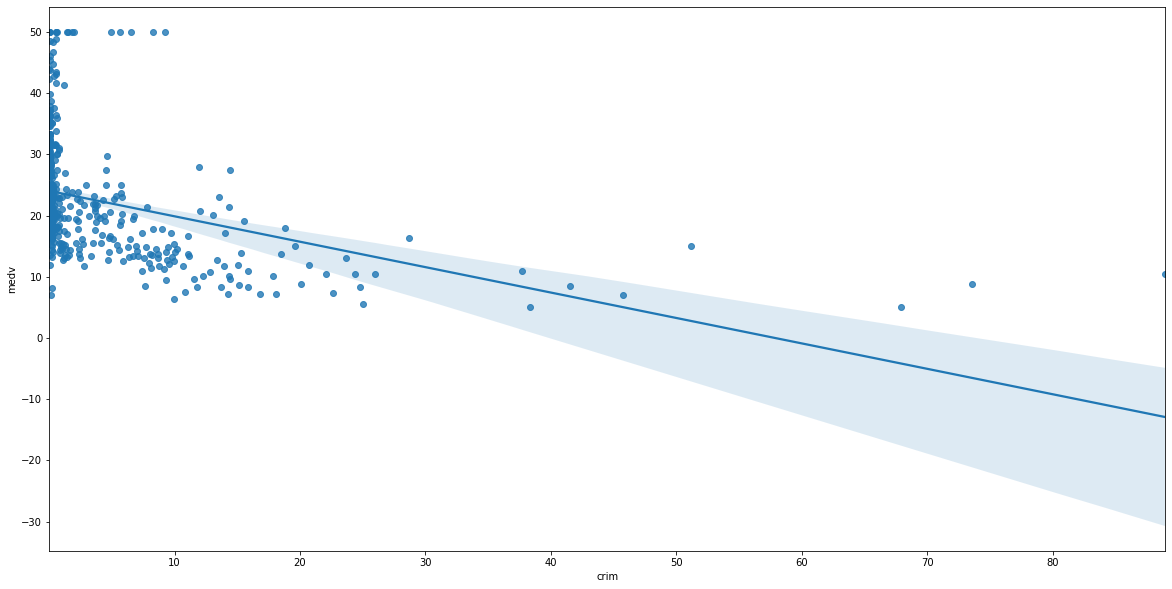

In [3]:
#your code here
plt.figure(figsize=(20, 10))
sns.regplot(data = df, x = 'crim', y = 'medv')
plt.show()

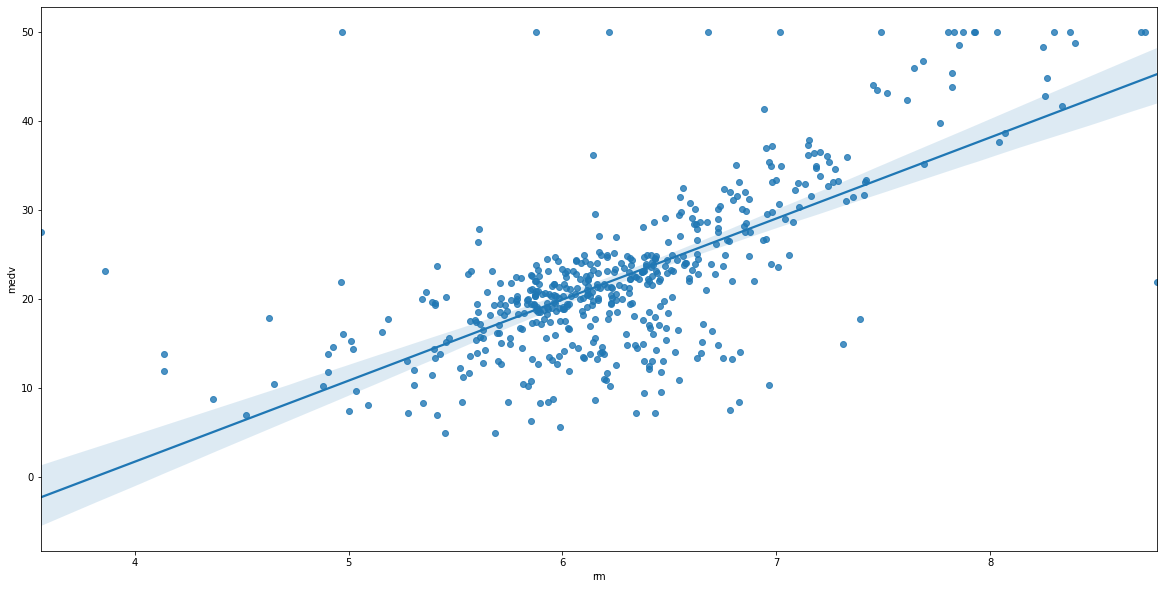

In [4]:
# Your plots here
plt.figure(figsize=(20, 10))
sns.regplot(data = df, x = 'rm', y = 'medv')
plt.show()

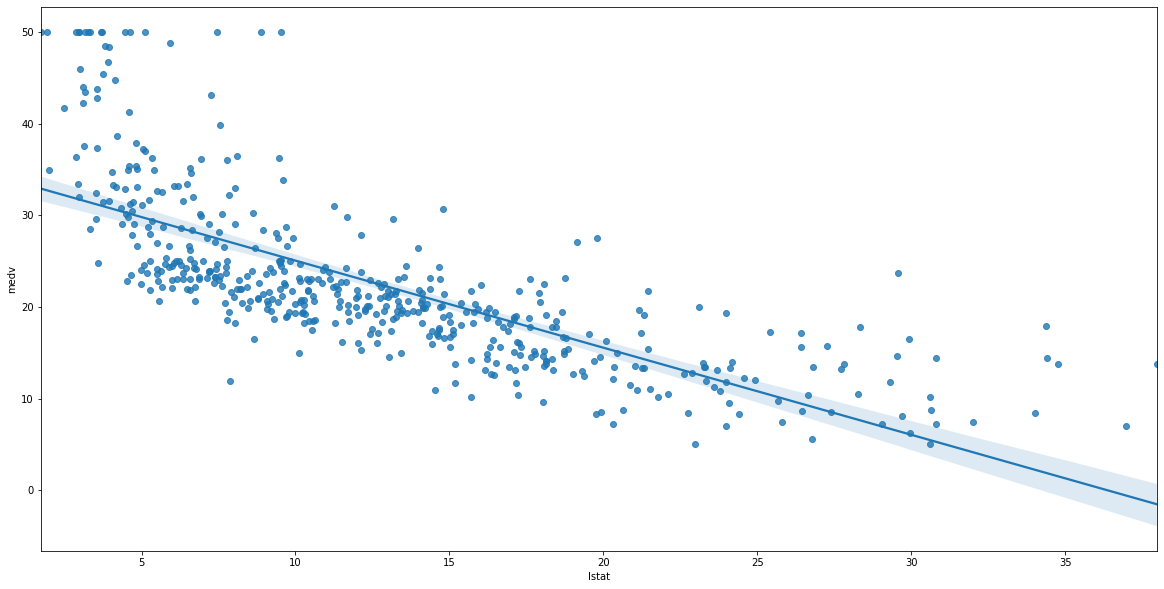

In [5]:
# Your plots here
plt.figure(figsize=(20, 10))
sns.regplot(data = df, x = 'lstat', y = 'medv')
plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables? 
- Reference: https://www.kaggle.com/c/boston-housing

In [6]:
### Your response here
# CRIM: negative correlation (as expected)
# RM: positive correlation (as expected)
# LSTAT: high negative corretation

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

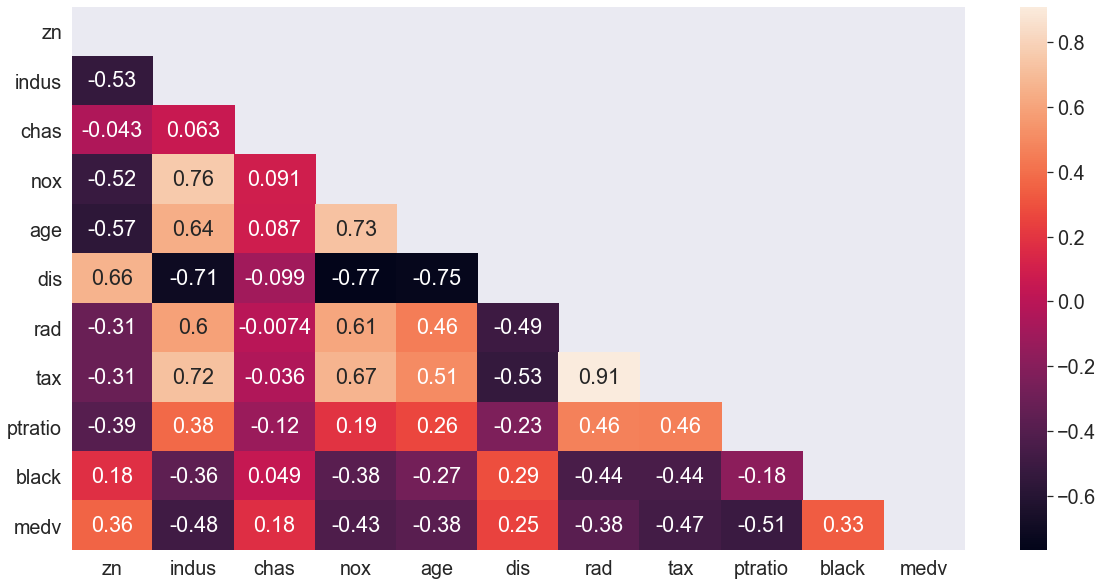

In [7]:
#your code here
boston_heat = df.drop(columns = ['crim', 'rm', 'lstat'], inplace = False)
mask = np.triu(np.ones_like(boston_heat.corr(), dtype=bool))

plt.figure(figsize = (20,10))
sns.set(font_scale=1.8)
sns.heatmap(boston_heat.corr(), mask = mask, annot=True)
plt.show()

#### Significant correlations


In [8]:
# Your code here
# DIS: high negative correlation with other variables
# RAD-TAX high correlation

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [9]:
# Your code here
print('median ', df['medv'].median())
df[['medv']].describe()

median  21.2


,medv
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


----

## 2- Developing a Model

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [10]:
#your code here
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

df = shuffle(df)
y = df["medv"]
X = df.drop(columns="medv")
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

----

## 3- Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [11]:
#your code here
from sklearn.ensemble import RandomForestRegressor

# Testing predictions
# max_depth = 2
model2 = RandomForestRegressor(max_depth=2, random_state=0)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

# max_depth = 4
model4 = RandomForestRegressor(max_depth=4, random_state=0)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

# max_depth = 6
model6 = RandomForestRegressor(max_depth=6, random_state=0)
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)

# max_depth = 8
model8 = RandomForestRegressor(max_depth=8, random_state=0)
model8.fit(X_train, y_train)
y_pred8 = model8.predict(X_test)

# max_depth = 10
model10 = RandomForestRegressor(max_depth=10, random_state=0)
model10.fit(X_train, y_train)
y_pred10 = model10.predict(X_test)

# need to go back to this question to plot the results

Now, plot the score for each tree on the training set and on the testing set.

What do these results tell you about the effect of the depth of the trees on the performance of the model?


In [12]:
# Your response here
# The higher the depth, the more effective the model is in this case. 
#But ir could also be a symptom of overfitting.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [13]:
# Your response here
# High variance because the model fits well to the data.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Based on your previous results run your model and explain its performance.

#### Train the Random forest regressor model with the optimal value for max_depth

In [14]:
#your code here
model = RandomForestRegressor(max_depth=6, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
pd.DataFrame({'test':y_test, 'predicted':y_pred})

model.score(X,y)

0.9456843647405768

#### Use the mean absolute error (MAE) to calculate the performance of the model

In [15]:
#your code here
import sklearn.metrics
sklearn.metrics.mean_absolute_error(y_test, y_pred)

2.2275048190888764

#### Use the root mean squared error (RMSE) to calculate the performance of the model

In [16]:
#your code here
import math
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
rmse

2.832975010935089

#### Create a function that calculates  and returns the r2 score as performance metric

In [17]:
#your code here
def r2_score(y_test, y_pred):
    return sklearn.metrics.r2_score(y_test, y_pred)

#### Calculate the r2 score of the model using the function defined above

In [18]:
#your code here
r2_score(y_test, y_pred)

0.8909713956692571

#### Bonus question
Read [this article](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) 
about the differences between MAE and RMSE. Do you think that one of the two types of error is more appropriate for this problem, and why?

In [19]:
#your answer here

### 4 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [20]:
#Your response here
